#  Zomato data analysis project

# Step 1: Set Up the Environment and Import Necessary Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Step 2: Load the Dataset

In [3]:
zomato_df = pd.read_csv('Zomato data .csv')
print(zomato_df.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


# Step 3: Clean and Prepare the Data 

1.) Convert Ratings: Since the rate column contains ratings with “/5,” split and convert it to a 
numeric format. 

In [4]:
def convert_rating(x):
    if isinstance(x, str):
        return float(x.split('/')[0])
    return np.nan

zomato_df['rate'] = zomato_df['rate'].apply(convert_rating)

In [5]:
print(zomato_df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


2.) Verify Data Types: Check the data types of all columns and the presence of null values. 

In [7]:
print(zomato_df.info())
print(zomato_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB
None
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


3.) Conclusion: Confirm there are no null values in the dataset. 

# Step 4: Data Analysis and Visualization 

# Analysis 1: Types of Restaurants  

1. Use a count plot to show the distribution of restaurant types.

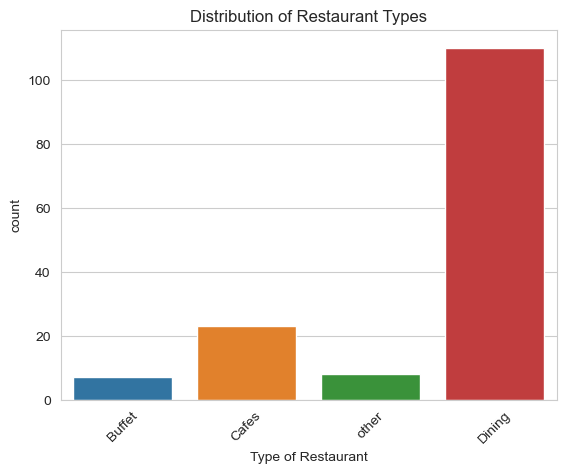

In [8]:
sns.countplot(x=zomato_df['listed_in(type)'])
plt.xlabel('Type of Restaurant')
plt.title('Distribution of Restaurant Types')
plt.xticks(rotation=45)
plt.show()

2. Conclusion: Note which type of restaurant is the most common. Dining seems to be 
preferred. 

# Analysis 2: Votes by Restaurant Type 

1. Group the data by listed_in(type) and calculate the sum of votes. 

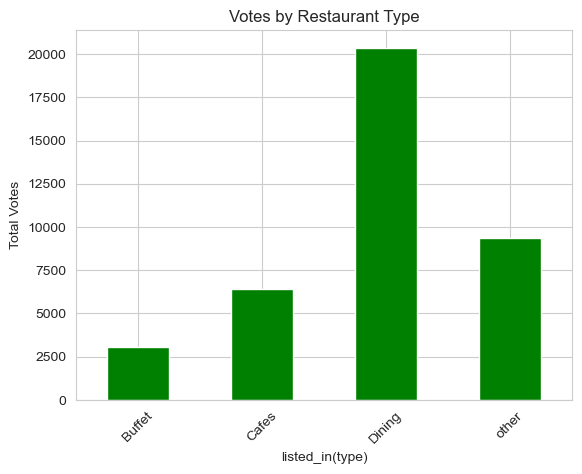

In [9]:
votes_by_type = zomato_df.groupby('listed_in(type)')['votes'].sum()
votes_by_type.plot(kind='bar', color='green')
plt.ylabel('Total Votes')
plt.title('Votes by Restaurant Type')
plt.xticks(rotation=45)
plt.show()

2. Plot the result to show the total votes per restaurant type. 

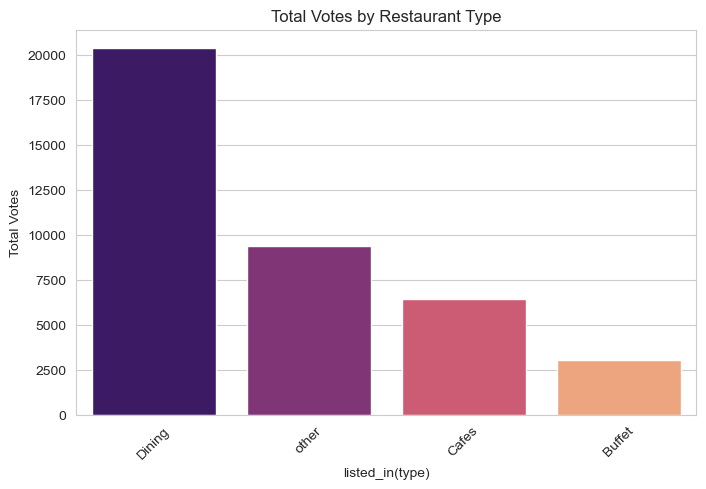

In [10]:
votes_by_type = zomato_df.groupby('listed_in(type)')['votes'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=votes_by_type.index, y=votes_by_type.values, palette="magma")
plt.title("Total Votes by Restaurant Type")
plt.xticks(rotation=45)
plt.ylabel("Total Votes")
plt.show()

# Analysis 3: Ratings Distribution 

1. Plot a histogram of the rate column to show the distribution of ratings.

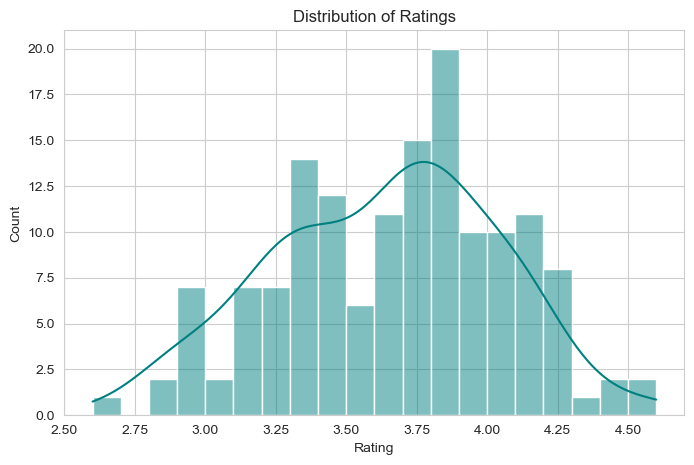

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(zomato_df['rate'], bins=20, kde=True, color="teal")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

2. Conclusion: Identify the rating range most restaurants fall into (typically 3.5 to 4). 

# Analysis 4: Restaurant Cost Preference for Couples 

1. Use a count plot to examine approx_cost(for two people). 

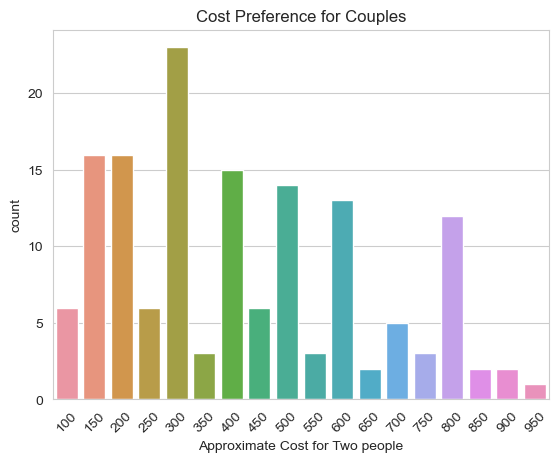

In [18]:
sns.countplot(x=zomato_df['approx_cost(for two people)'])
plt.xlabel('Approximate Cost for Two people')
plt.title('Cost Preference for Couples')
plt.xticks(rotation=45)
plt.show()

# Analysis 5: Online vs. Offline Ratings 

1. Create a box plot to compare ratings for online vs. offline orders.

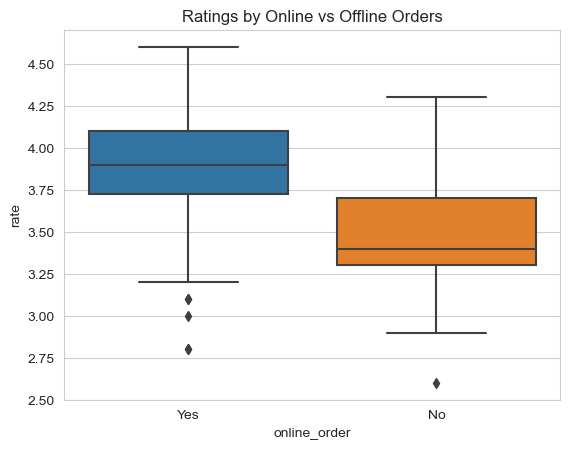

In [19]:
sns.boxplot(x='online_order', y='rate', data=zomato_df)
plt.title('Ratings by Online vs Offline Orders')
plt.show()

2. Conclusion: Observe if online orders have higher ratings than offline ones. 

# Analysis 6: Online Orders by Restaurant Type 

1. Create a pivot table to show the number of restaurants offering online vs. offline orders 
by type. 
2. Use a heatmap to visualize this data.

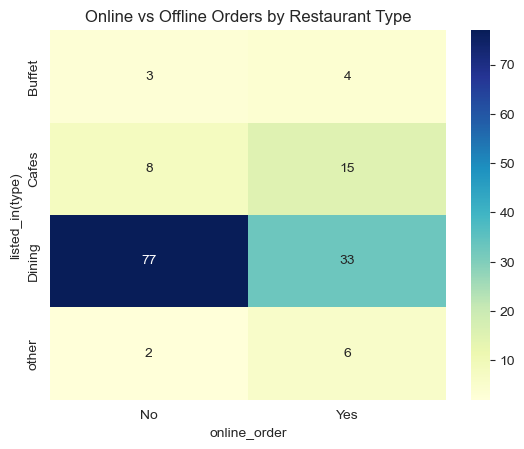

In [22]:
pivot_table = zomato_df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Online vs Offline Orders by Restaurant Type')
plt.show()

Conclusion: Note the preference of online orders for cafes and offline orders for dining 
restaurants. 

# 7. Find the Insights : 

# 1.) What type of restaurant do the majority of customers order from? 

In [24]:
most_common_type = zomato_df['listed_in(type)'].mode()[0]
print(f"1) Most common restaurant type ordered by customers: {most_common_type}")

1) Most common restaurant type ordered by customers: Dining


# 2.) How many votes has each type of restaurant received from customers? 

In [25]:
votes_by_type = zomato_df.groupby('listed_in(type)')['votes'].sum().sort_values(ascending=False)
print("\n2) Total votes received by each restaurant type:")
print(votes_by_type)


2) Total votes received by each restaurant type:
listed_in(type)
Dining    20363
other      9367
Cafes      6434
Buffet     3028
Name: votes, dtype: int64


# 3.) What are the ratings that the majority of restaurants have received? 


3) Ratings statistics (summary):
count    148.000000
mean       3.633108
std        0.402271
min        2.600000
25%        3.300000
50%        3.700000
75%        3.900000
max        4.600000
Name: rate, dtype: float64


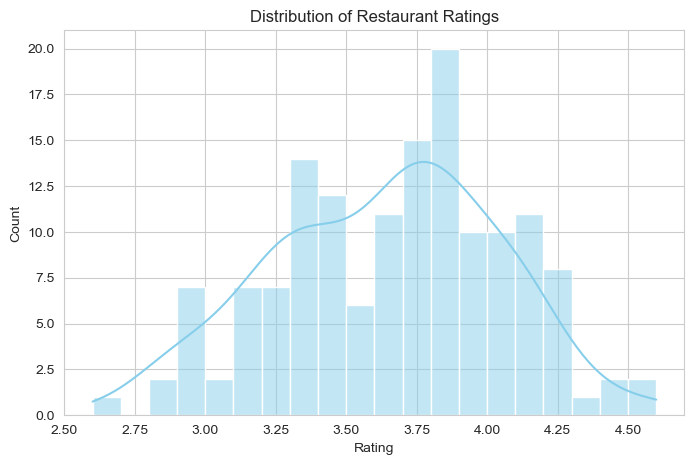

In [26]:
print("\n3) Ratings statistics (summary):")
print(zomato_df['rate'].describe())
# Optionally, see rating distribution
plt.figure(figsize=(8,5))
sns.histplot(zomato_df['rate'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# 4.) Zomato has observed that most couples order most of their food online. What is their average spending on each other? 


In [27]:
avg_cost_online_couples = zomato_df[zomato_df['online_order']=='Yes']['approx_cost(for two people)'].mean()
print(f"\n4) Average spending of couples ordering food online: Rs. {avg_cost_online_couples:.2f}")


4) Average spending of couples ordering food online: Rs. 510.34


# 5.) Which mode ( online or offline ) has received the maximum rating? 

In [28]:
avg_rating_by_order_mode = zomato_df.groupby('online_order')['rate'].mean()
max_rating_mode = avg_rating_by_order_mode.idxmax()
print("\n5) Average ratings by order mode:")
print(avg_rating_by_order_mode)
print(f"The mode with the highest average rating is: {max_rating_mode}")


5) Average ratings by order mode:
online_order
No     3.487778
Yes    3.858621
Name: rate, dtype: float64
The mode with the highest average rating is: Yes


# 6.) Which type received more offline orders, so that Zomato can provide those customers with some good offers?  


In [29]:
offline_orders_count = zomato_df[zomato_df['online_order']=='No']['listed_in(type)'].value_counts()
more_offline_type = offline_orders_count.idxmax()
print("\n6) Offline orders count by restaurant type:")
print(offline_orders_count)
print(f"The restaurant type with the most offline orders is: {more_offline_type}")


6) Offline orders count by restaurant type:
listed_in(type)
Dining    77
Cafes      8
Buffet     3
other      2
Name: count, dtype: int64
The restaurant type with the most offline orders is: Dining
